In [5]:
from mlpipeline_analyzer import PipelineDiagram
from sklearn.svm import SVC
from sklearn.pipeline import *
from sklearn.preprocessing import *
from sklearn.discriminant_analysis import *
from sklearn.impute import *
import numpy as np

def sum():
    return
    
model = SVC(C=1.0, kernel='poly', degree=5, gamma='scale')
pipeline = Pipeline([('custom',sum()),('labelencoder',LabelEncoder()), #-- Pipe Transformer 1
                     ("imputer", SimpleImputer(missing_values=np.nan, strategy='mean')), #-- Pipe Transformer 2
                     ('scale', FeatureUnion([
                ('minmax', MinMaxScaler()),    #-- Parallel Transformer 3
                ('standardscaler', StandardScaler()),  #-- Parallel Transformer 4
                ('normalize', Normalizer())])),#-- Parallel Transformer 5
            ("LDA", LinearDiscriminantAnalysis()), #-- Pipe Transformer 6
	     ('classifier', model)]) 	      #-- Pipe Classifier/Predictor 7

In [17]:
type(pipeline[5])

sklearn.svm._classes.SVC

In [27]:
pipeline

Pipeline(steps=[('labelencoder', LabelEncoder()), ('imputer', SimpleImputer()),
                ('scale',
                 FeatureUnion(transformer_list=[('minmax', MinMaxScaler()),
                                                ('standardscaler',
                                                 StandardScaler()),
                                                ('normalize', Normalizer())])),
                ('LDA', LinearDiscriminantAnalysis()),
                ('classifier', SVC(degree=5, kernel='poly'))])

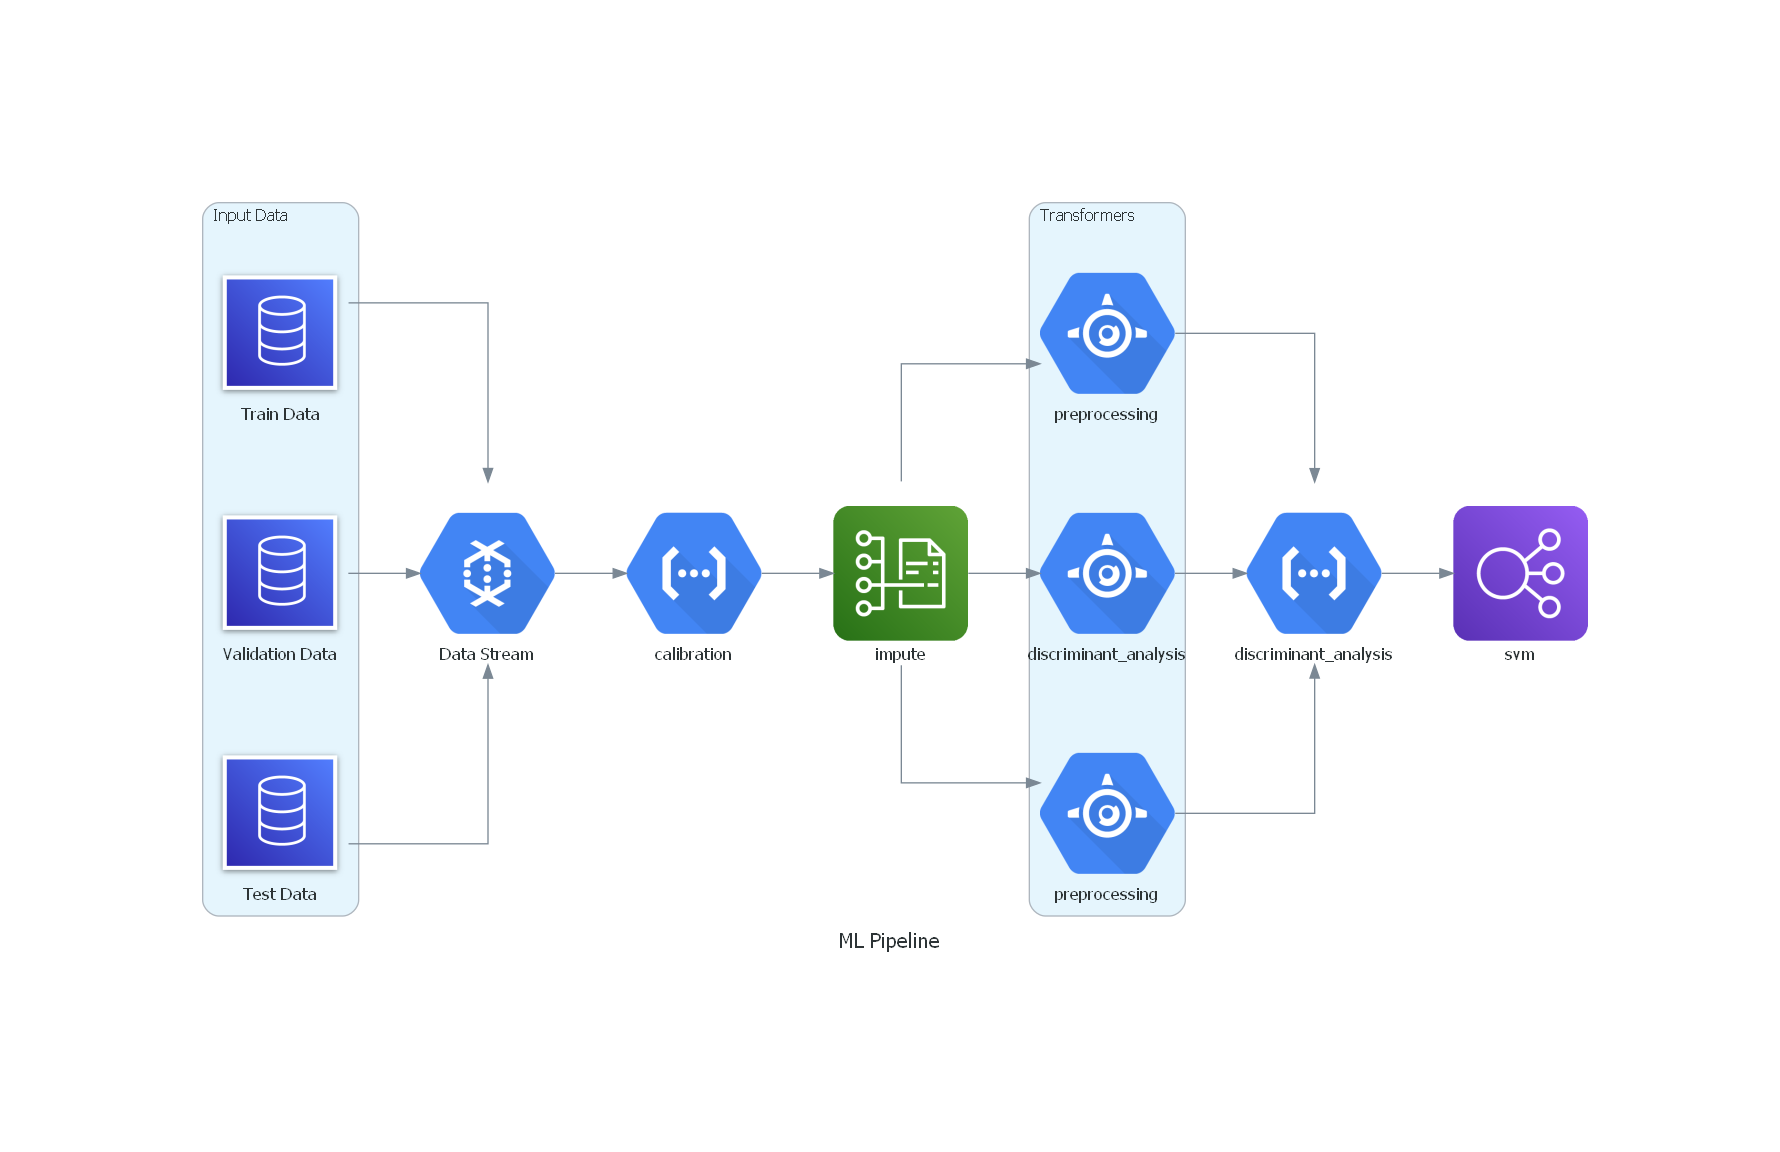

In [28]:
a = PipelineDiagram(pipeline)
a.show()

In [1]:
import evalml
X, y = evalml.demos.load_breast_cancer()
X_train, X_test, y_train, y_test = evalml.preprocessing.split_data(X, y, problem_type='binary')

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


         Number of Features
Numeric                  30

Number of training examples: 569
Targets
benign       62.74%
malignant    37.26%
Name: target, dtype: object


In [2]:
from evalml.automl import AutoMLSearch
automl = AutoMLSearch(X_train=X_train, y_train=y_train, problem_type='binary')
automl.search()

In [18]:
pipeline = automl.best_pipeline
pipeline

pipeline = BinaryClassificationPipeline(component_graph={'Label Encoder': ['Label Encoder', 'X', 'y'], 'Imputer': ['Imputer', 'X', 'Label Encoder.y'], 'Standard Scaler': ['Standard Scaler', 'Imputer.x', 'Label Encoder.y'], 'Elastic Net Classifier': ['Elastic Net Classifier', 'Standard Scaler.x', 'Label Encoder.y']}, parameters={'Label Encoder':{'positive_label': None}, 'Imputer':{'categorical_impute_strategy': 'most_frequent', 'numeric_impute_strategy': 'mean', 'categorical_fill_value': None, 'numeric_fill_value': None}, 'Elastic Net Classifier':{'penalty': 'elasticnet', 'C': 1.0, 'l1_ratio': 0.15, 'n_jobs': -1, 'multi_class': 'auto', 'solver': 'saga'}}, random_seed=0)

In [23]:
list(pipeline)

[LabelEncoder(positive_label=None),
 Imputer(categorical_impute_strategy='most_frequent', numeric_impute_strategy='mean', categorical_fill_value=None, numeric_fill_value=None),
 StandardScaler(),
 ElasticNetClassifier(penalty='elasticnet', C=1.0, l1_ratio=0.15, n_jobs=-1, multi_class='auto', solver='saga')]

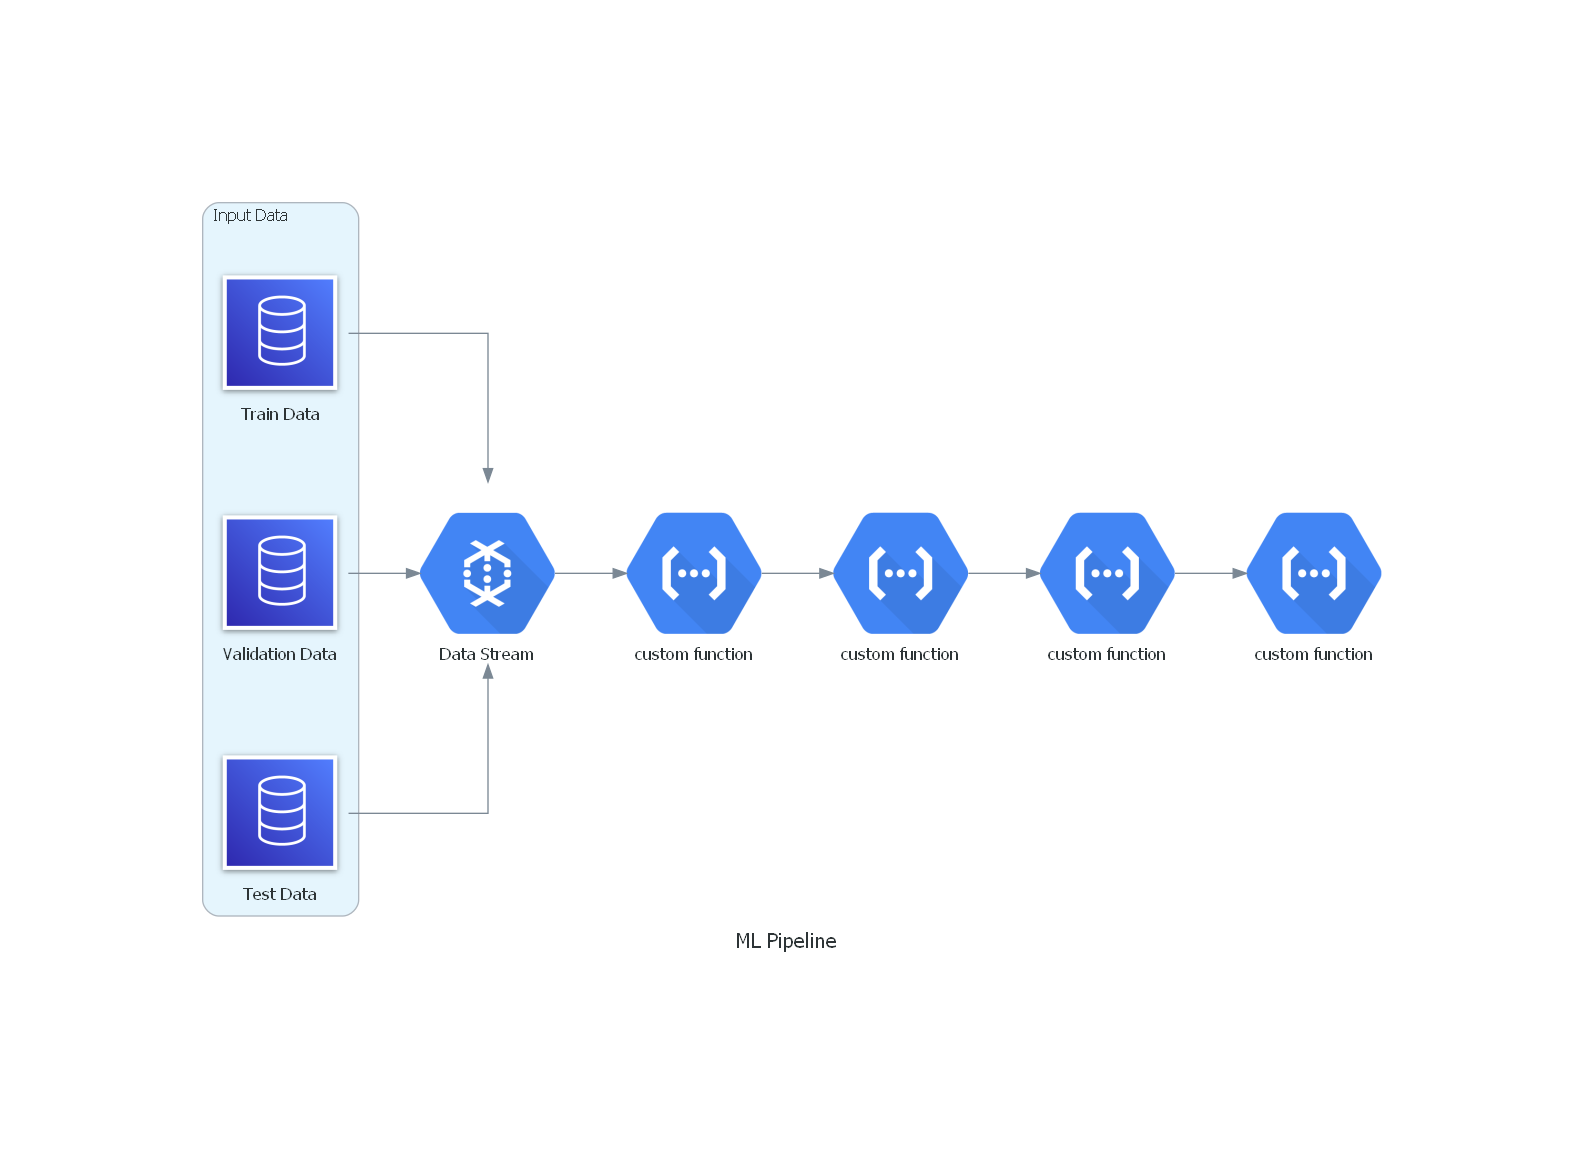

In [5]:
from mlpipeline_analyzer import PipelineDiagram
a = PipelineDiagram(pipeline)
a.show()

In [15]:
pipeline[0]

FeatureUnion(transformer_list=[('minmax', MinMaxScaler()),
                               ('standardscaler', StandardScaler()),
                               ('normalize', Normalizer())])

In [11]:
pipeline

pipeline = BinaryClassificationPipeline(component_graph={'Label Encoder': ['Label Encoder', 'X', 'y'], 'Imputer': ['Imputer', 'X', 'Label Encoder.y'], 'Standard Scaler': ['Standard Scaler', 'Imputer.x', 'Label Encoder.y'], 'Elastic Net Classifier': ['Elastic Net Classifier', 'Standard Scaler.x', 'Label Encoder.y']}, parameters={'Label Encoder':{'positive_label': None}, 'Imputer':{'categorical_impute_strategy': 'most_frequent', 'numeric_impute_strategy': 'mean', 'categorical_fill_value': None, 'numeric_fill_value': None}, 'Elastic Net Classifier':{'penalty': 'elasticnet', 'C': 1.0, 'l1_ratio': 0.15, 'n_jobs': -1, 'multi_class': 'auto', 'solver': 'saga'}}, random_seed=0)